In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.integrate as integrate
import csv
plt.style.use('darkside')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [56]:
!pwd

/home/as111/sipm-analysis


# PEN Emission Spectrum

Pen spectrum integral = 1231639.2844097028+/-51.223351082764566


Text(0, 0.5, 'Intensity [$\\rm nm^{-1}$]')

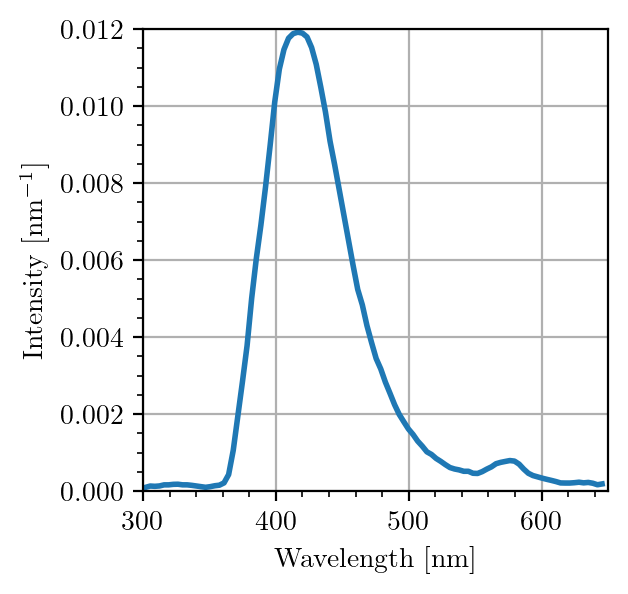

In [57]:
HC_eV = 1.2398420e-06
nm = 1e9
# From 2PAC G4DS
# Probably from https://iopscience.iop.org/article/10.1088/0022-3727/30/2/004/pdf
w_pen_93k = []
e_pen_93k = []
with open('data/pen/pen_emission_spectrum_93k.csv') as f:
    r = csv.reader(f)
    header = next(r)
    for row in r:
        if(len(row)==0):
            break
        w_pen_93k.append(HC_eV/float(row[0])*nm)
        e_pen_93k.append(float(row[1])*600)

I_pen_raw = interp1d(w_pen_93k, e_pen_93k)
lambda_min = w_pen_93k[-1]
lambda_max = w_pen_93k[0]
integral_pen = integrate.quad(lambda x: I_pen_raw(x), lambda_min, lambda_max, epsrel=1e-4, limit=500)
print('Pen spectrum integral = {}+/-{}'.format(*integral_pen))

I_pen = interp1d(w_pen_93k, np.array(e_pen_93k)/integral_pen[0])
wl_list = np.linspace(lambda_min, lambda_max, 100)
plt.figure(1, figsize=(3,3))
plt.grid()
plt.minorticks_on()
plt.plot(wl_list, I_pen(wl_list))
plt.xlim(300, 650)
plt.xlabel('Wavelength [nm]')
plt.ylabel(r'Intensity [$\rm nm^{-1}$]')

# Dry reflectivity spectrum

In [58]:
class Lambda650Spectrum:
    def __init__(self, filename, title):
        self.title = title
        self.filename = filename
        self.wavelengths = [] # nm
        self.reflectivities = [] # %R
        self.read(filename)
        self.interpolator = interp1d(self.wavelengths, self.reflectivities)

    def read(self, filename):
        with open(f'data/reflector/{filename}') as f:
            r = csv.reader(f)
            header = next(r)
            for row in r:
                if(len(row)==0):
                    break
                self.wavelengths.append(float(row[0]))
                self.reflectivities.append(float(row[1]))

    def eval_reflectivity(self,wl):
        return float(self.interpolator(wl))

In [59]:
tyvek_i59_list = [
    Lambda650Spectrum(filename='PEN_TyvekI59_coated_black.csv', title='PEN/Tyvek-I59 coated/Black'),
    Lambda650Spectrum(filename='PEN_TyvekI59_coated.csv', title='PEN/Tyvek-I59 coated'),
    Lambda650Spectrum(filename='PEN_TyvekI59_noncoated_black.csv', title='PEN/Tyvek-I59 non-coated/Black'),
    Lambda650Spectrum(filename='PEN_TyvekI59_noncoated.csv', title='PEN/Tyvek-I59 non-coated'),
    Lambda650Spectrum(filename='TyvekI59_coated_black.csv', title='Tyvek-I59 coated/Black'),
    Lambda650Spectrum(filename='TyvekI59_coated.csv', title='Tyvek-I59 coated'),
    Lambda650Spectrum(filename='TyvekI59_noncoated_black.csv', title='Tyvek-I59 non-coated/Black'),
    Lambda650Spectrum(filename='TyvekI59_noncoated.csv', title='Tyvek-I59 non-coated'),
]
tyvek_a59_list = [
    Lambda650Spectrum(filename='PEN_TyvekA59_front_black.csv', title='PEN/Tyvek-A59 front/Black'),
    Lambda650Spectrum(filename='PEN_TyvekA59_front.csv', title='PEN/Tyvek-A59 front'),
    Lambda650Spectrum(filename='PEN_TyvekA59_back_black.csv', title='PEN/Tyvek-A59 back/Black'),
    Lambda650Spectrum(filename='PEN_TyvekA59_back.csv', title='PEN/Tyvek-A59 back'),
    Lambda650Spectrum(filename='TyvekA59_front_black.csv', title='Tyvek-A59 front/Black'),
    Lambda650Spectrum(filename='TyvekA59_front.csv', title='Tyvek-A59 front'),
    Lambda650Spectrum(filename='TyvekA59_back_black.csv', title='Tyvek-A59 back/Black'),
    Lambda650Spectrum(filename='TyvekA59_back.csv', title='Tyvek-A59 back'),
]

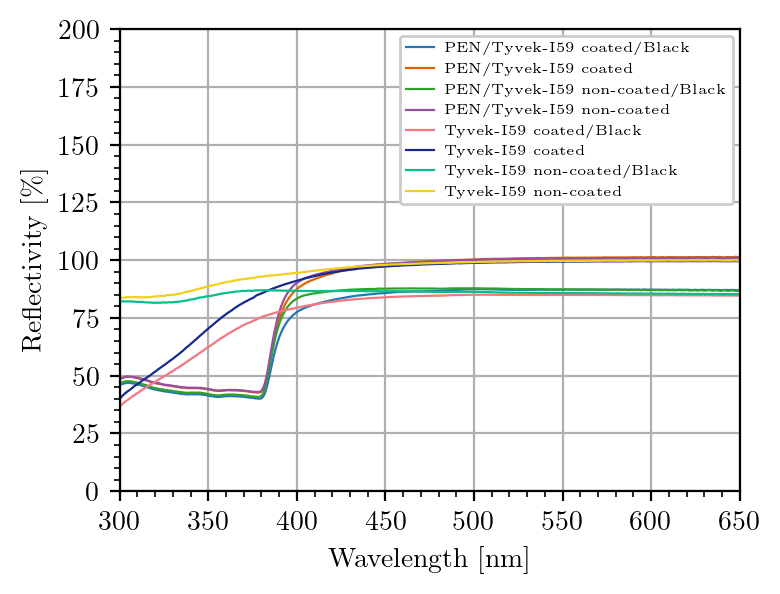

In [60]:
for t in tyvek_i59_list:
    plt.plot(t.wavelengths, t.reflectivities, label=t.title, linewidth=0.8)
plt.legend(loc='upper right',fontsize=5)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflectivity [\%]')
plt.xlim(300, 650)
plt.ylim(0, 200)
plt.grid()
plt.minorticks_on()

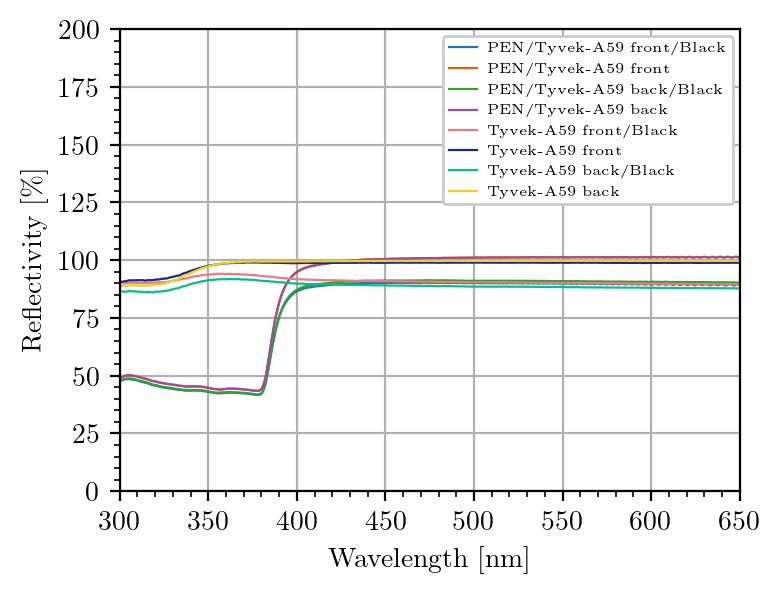

In [61]:
for t in tyvek_a59_list:
    plt.plot(t.wavelengths, t.reflectivities, label=t.title, linewidth=0.8)
plt.legend(loc='upper right',fontsize=5)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflectivity [\%]')
plt.xlim(300, 650)
plt.ylim(0, 200)
plt.grid()
plt.minorticks_on()

PEN emission peak = 417nm


(0.0, 180.0)

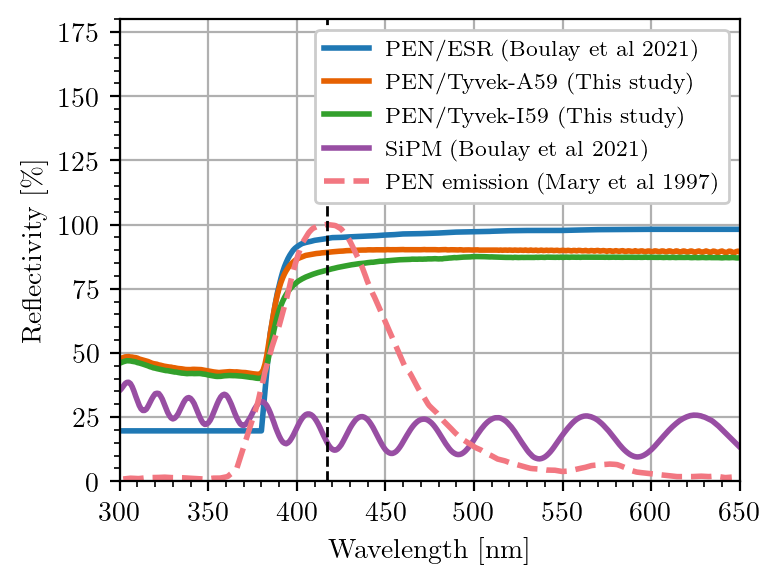

In [62]:
HC_eV = 1.2398420e-06
nm = 1e9
# From 2PAC G4DS
# photon energy in eV
wavelength = [0.1, 2.067,2.175,2.214,2.255,2.340,2.385,2.431,2.436,2.531,2.583,2.638,2.696,2.725,2.756,2.787,2.818,2.884,2.918,2.952,2.988,3.024,3.039,3.047,3.054,3.062,3.069,3.077,3.085,3.092,3.100,3.108,3.116,3.123,3.131,3.139,3.147,3.155,3.163,3.171,3.179,3.188,3.196,3.204,3.212,3.221,3.263, 8.0]
# reflectance relative to BaSO4 (0.98)
reflectance = [100.130, 100.130,99.995,99.856,99.681,99.659,99.569,99.351,99.306,99.018,98.652,98.415,98.283,98.018,97.856,97.606,97.457,97.134,96.928,96.827,96.247,95.737,95.359,95.197,95.048,94.876,94.684,94.463,94.055,93.650,93.147,92.562,91.812,90.904,89.807,88.506,86.957,85.242,83.156,80.678,77.811,74.615,71.004,67.089,62.924,58.670,20.000,20.000]

for i in range(len(wavelength)):
    wavelength[i] = HC_eV/wavelength[i] * nm
    reflectance[i] *= 0.98

# SiPM transmittance taken from G4DS master
wavelength_sipm = []
reflectance_sipm = []
with open('data/sipm/SiPM_transmittance_7deg_AstroCent.csv') as f:
    r = csv.reader(f)
    header = next(r)
    for row in r:
        if(len(row)==0):
            break
        wavelength_sipm.append(HC_eV/float(row[0])*nm)
        reflectance_sipm.append(100*(1-float(row[1])))

w_esr = []
r_esr = []
with open('data/reflector/PEN_ESR_Black.csv') as f:
    r = csv.reader(f)
    header = next(r)
    for row in r:
        if(len(row)==0):
            break
        w_esr.append(float(row[0]))
        r_esr.append(float(row[1]))

w_esr_mir = []
r_esr_mir = []
with open('data/reflector/PEN_ESR_Black_Mirror_Calibrated.csv') as f:
    r = csv.reader(f)
    header = next(r)
    for row in r:
        if(len(row)==0):
            break
        w_esr_mir.append(float(row[0]))
        r_esr_mir.append(float(row[1]))

w_tyveka59 = []
r_tyveka59 = []
with open('data/reflector/PEN_TyvekA59_front_black.csv') as f:
    r = csv.reader(f)
    header = next(r)
    for row in r:
        if(len(row)==0):
            break
        w_tyveka59.append(float(row[0]))
        r_tyveka59.append(float(row[1]))

w_tyveki59 = []
r_tyveki59 = []
with open('data/reflector/PEN_TyvekI59_coated_black.csv') as f:
    r = csv.reader(f)
    header = next(r)
    for row in r:
        if(len(row)==0):
            break
        w_tyveki59.append(float(row[0]))
        r_tyveki59.append(float(row[1]))

ymax = 180
plt.figure(1, figsize=(4,3))
plt.grid()
plt.minorticks_on()
plt.plot(wavelength, reflectance, label='PEN/ESR (Boulay et al 2021)')
plt.plot(w_tyveka59, np.array(r_tyveka59), label='PEN/Tyvek-A59 (This study)')
plt.plot(w_tyveki59, np.array(r_tyveki59), label='PEN/Tyvek-I59 (This study)')
plt.plot(wavelength_sipm, reflectance_sipm, label='SiPM (Boulay et al 2021)')
# plt.plot(w_esr, np.array(r_esr), label='PEN-ESR-Black (Princeton)')
# plt.plot(w_esr_mir, np.array(r_esr_mir), label='PEN-ESR-Black (Princeton, mirror calibrated)')
wl_list = np.linspace(w_pen_93k[-1], w_pen_93k[0], 500)
I_pen_list = I_pen(wl_list)
scale = 100/np.max(I_pen_list)
wl_peak_pen = wl_list[np.argmax(I_pen_list)]
print('PEN emission peak = {:.0f}nm'.format(wl_list[np.argmax(I_pen_list)]))
plt.plot(wl_list, I_pen_list*scale, '--', label='PEN emission (Mary et al 1997)')
plt.plot([wl_peak_pen, wl_peak_pen], [0, ymax], 'k--', linewidth=1)

plt.legend(loc='upper right')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflectivity [\%]')
plt.xlim(300, 650)
plt.ylim(0, ymax)
# plt.savefig('ref_esr_tyvek.png')

Notice the sharp drop at 380nm. Probably due to PEN absorption.

In [63]:
esr_refl = interp1d(wavelength, reflectance)
sipm_refl = interp1d(wavelength_sipm, reflectance_sipm)
tyveka59_refl = interp1d(w_tyveka59, r_tyveka59)
tyveki59_refl = interp1d(w_tyveki59, r_tyveki59)

print('R_esr(417nm)={:.1f}%'.format(esr_refl(wl_peak_pen)))
print('R_tyvekA59(417nm)={:.1f}%'.format(tyveka59_refl(wl_peak_pen)))
print('R_tyvekI59(417nm)={:.1f}%'.format(tyveki59_refl(wl_peak_pen)))
print('R_sipm(417nm)={:.1f}%'.format(sipm_refl(wl_peak_pen)))

R_esr(417nm)=94.5%
R_tyvekA59(417nm)=89.1%
R_tyvekI59(417nm)=82.2%
R_sipm(417nm)=15.2%


# SiPM PDE
From DS-20k characterization paper (in progress)

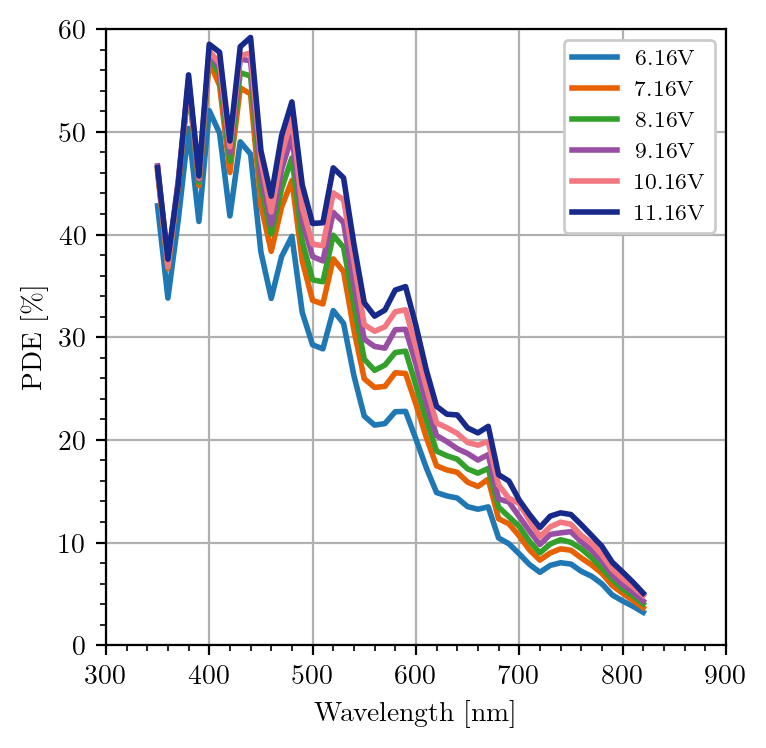

In [64]:
import ROOT

plt.figure(0,figsize=(4,4))
vov = [6.16,7.16,8.16,9.16,10.16,11.16]
pde_curves = []
for v in vov:
    pde_curves.append({'wavelength':[],'pde':[]})
    with open('data/sipm/PDE_{}V.csv'.format(v)) as f:
        r = csv.reader(f)
        header = next(r)
        for row in r:
            if(len(row)==0):
                break
            pde_curves[-1]['wavelength'].append(float(row[0]))
            pde_curves[-1]['pde'].append(float(row[1]))
    plt.plot(np.array(pde_curves[-1]['wavelength']), np.array(pde_curves[-1]['pde']), label='{:.2f}V'.format(v))
plt.legend(loc='upper right')
plt.minorticks_on()
plt.grid()
plt.xlabel('Wavelength [nm]')
plt.ylabel('PDE [\%]')

pde_volt = []
for i in range(len(vov)):
    pde_volt.append(interp1d(np.array(pde_curves[i]['wavelength']), np.array(pde_curves[i]['pde'])))

## Light yield ratio vs reflectivity

Assume monochromatic PEN emission at 417nm

$$\frac{L_{y}^{\rm Tyvek}}{L_{y}^{\rm ESR}} = \frac{1 - f_p R_p - f_w R_{\rm ESR}}{1 - f_p R_p - f_w R_{\rm Tyvek}}$$

In [69]:
class LyRatioCalculator:
    def __init__(self, total_area, window_area, r_esr, r_sipm, r_tyvek, title, dfw_percent):
        self.total_area = total_area
        self.window_area = window_area
        self.r_esr = r_esr
        self.r_sipm = r_sipm
        self.r_tyvek = r_tyvek
        self.fw = window_area/total_area
        print(f'SiPM coverage={self.fw*100:.1f}%')
        self.fr = 1-self.fw
        self.title = title
        self.dfw = self.fw*dfw_percent/100
        self.fw_esr = self.fw
        self.fw_tyvek = self.fw
        self.fr_esr = 1-self.fw_esr
        self.fr_tyvek = 1-self.fw_tyvek
        
    def get_ly_ratio(self, r_tyvek):
        return self.fw_tyvek*(1-self.fw_esr*self.r_sipm-self.fr_esr*self.r_esr)/self.fw_esr/(1-self.fw_tyvek*self.r_sipm-self.fr_tyvek*r_tyvek)

    def set_experimental_results(self, lyr, lyr_err):
        self.lyr_exp = lyr
        self.lyr_err_exp = lyr_err

    def draw_ly_ratio_curve(self):
        plt.figure(0,figsize=(3,3))
        xmin = 0
        xmax = 100
        ymax = 1.2
        xlist = np.linspace(xmin, xmax, 100)
        projected_lyr = self.get_ly_ratio(self.r_tyvek)
        plt.plot(xlist, self.get_ly_ratio(xlist/100),'b-', linewidth=0.5)
        self.fw_tyvek = self.fw+self.dfw
        self.fr_tyvek = 1-self.fw_tyvek
        projected_lyr_upper = self.get_ly_ratio(self.r_tyvek)
        upper_bound = self.get_ly_ratio(xlist/100)
        self.fw_tyvek = self.fw-self.dfw
        self.fr_tyvek = 1-self.fw_tyvek
        projected_lyr_lower = self.get_ly_ratio(self.r_tyvek)
        lower_bound = self.get_ly_ratio(xlist/100)
        self.fw_tyvek = self.fw
        self.fr_tyvek = 1-self.fw_tyvek
        plt.fill_between(
            x=xlist,
            y1=lower_bound, 
            y2=upper_bound,
            facecolor='b',alpha=0.5
        )
        plt.plot([0,100],[self.lyr_exp,self.lyr_exp], 'r-', linewidth=0.5)
        plt.fill_between(
            x=[0,100],
            y1=[self.lyr_exp+self.lyr_err_exp], 
            y2=[self.lyr_exp-self.lyr_err_exp],
            facecolor='r',alpha=0.5
        )
        plt.xlim(0, 100)
        plt.ylim(0, ymax)
        plt.minorticks_on()
        plt.grid()
        plt.ylabel(r'$L_y^{\rm Tyvek}/L_y^{\rm ESR}$')
        plt.xlabel(r'$R_{\rm Tyvek} [\%]$')
        plt.title(self.title)
        
        print('Projected light yield ratio = {:.3f}'.format(projected_lyr))
        plt.plot(100*np.array([self.r_tyvek]*2), [0,ymax], 'k--', linewidth=1.0)
        plt.text(20,0.8,r'R(PEN-Tyvek)=${:.1f}\%$ @ 417nm'.format(self.r_tyvek*100)+'\n'+r'Projected LY ratio=${:.2f}\pm{:.2f}$'.format(projected_lyr,(projected_lyr_upper-projected_lyr_lower)/2),fontsize=6,bbox=dict(facecolor='white',edgecolor='black',alpha=0.5))
        plt.text(5,self.lyr_exp+0.1,r'Measured LY ratio=${:.3f}\pm{:.3f}$'.format(self.lyr_exp, self.lyr_err_exp),fontsize=6,bbox=dict(facecolor='white',edgecolor='red',alpha=0.5),color='r')

In [70]:
cm = 1.0
radius = 4.75*cm
height = 4.5*cm
Atot = 2*np.pi*radius**2 + 2*np.pi*radius*height
R_esr = esr_refl(wl_peak_pen)/100
R_sipm = sipm_refl(wl_peak_pen)/100
R_tyveki59 = tyveki59_refl(wl_peak_pen)/100
R_tyveka59 = tyveka59_refl(wl_peak_pen)/100
run1 = LyRatioCalculator(total_area = Atot, window_area = 3.0*cm*3.0*cm, r_esr=R_esr, r_sipm=R_sipm, r_tyvek=R_tyveka59, title='Run1: Tyvek-A59 vs ESR', dfw_percent=30)
run2 = LyRatioCalculator(total_area = Atot, window_area = 3.9*cm*3.9*cm, r_esr=R_esr, r_sipm=R_sipm, r_tyvek=R_tyveki59, title='Run2: Tyvek-I59 vs ESR', dfw_percent=10)

SiPM coverage=3.3%
SiPM coverage=5.5%


Projected light yield ratio = 0.605


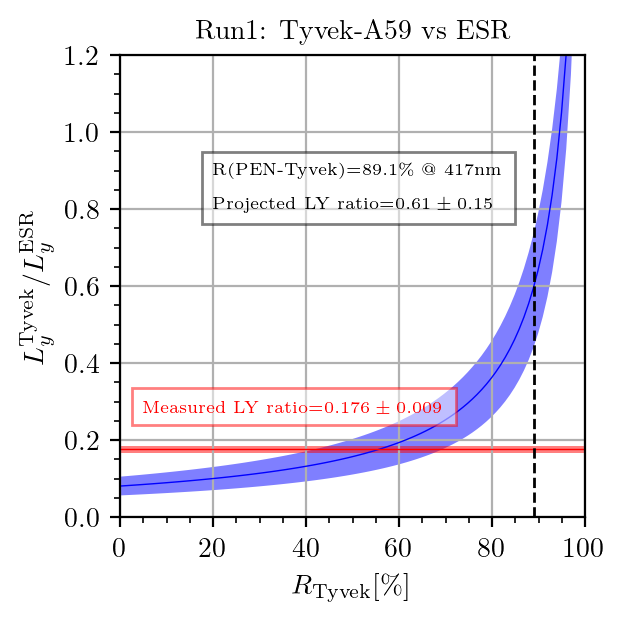

In [71]:
run1.set_experimental_results(lyr=0.176, lyr_err=0.009)
run1.draw_ly_ratio_curve()

Projected light yield ratio = 0.457


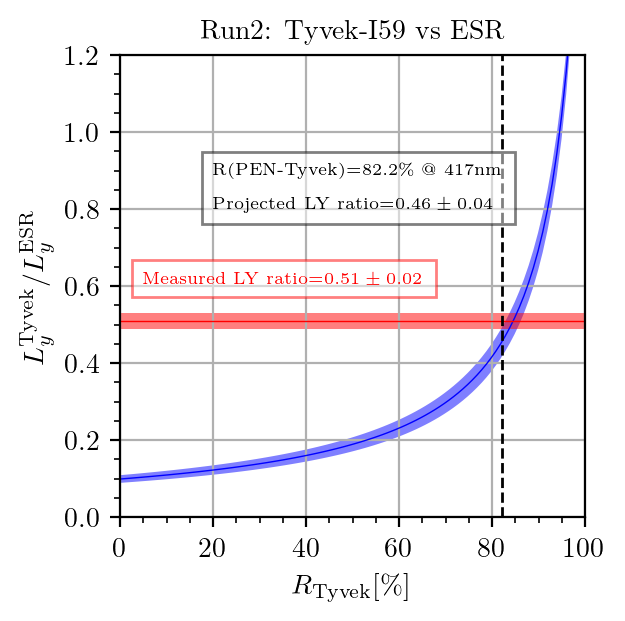

In [68]:
run2.set_experimental_results(lyr=0.51, lyr_err=0.02)
run2.draw_ly_ratio_curve()

## Light Yield
- $N_\gamma$: LAr photon yield (~40ph/keV)

- $f_w$: PEN-reflector area fraction

- $f_p$: Photon detection area fraction ($f_w+f_p=1$)

- $\varepsilon_w$: PEN wavelength shifting efficiency

- $I_w$: PEN emission spectrum

- $\epsilon_p$: SiPM PDE

- $R$: Average reflectivity ($R=f_p R_p + f_w R_w$)

- $R_p$: Fused silica-SiPM effective reflectivity

- $R_w$: PEN-reflector effective reflectivity



$$L_y = N_\gamma f_w \varepsilon_w f_p \int \frac{I_w(\lambda)\varepsilon_p(\lambda)}{1-R(\lambda)} \, d\lambda$$

In [72]:
def ly_integrand_esr(wl, iv, fp, fw):
    return pde_volt[iv](wl)/100*I_pen(wl)/(1-fp**sipm_refl(wl)/100-fw*esr_refl(wl)/100)

def ly_integrand_tyvek(wl, iv, fp, fw):
    return pde_volt[iv](wl)/100*I_pen(wl)/(1-fp*sipm_refl(wl)/100-fw*tyveka59_refl(wl)/100)

# Project Tyvek-to-ESR light yield ratio from dry reflectivity

In [73]:
Ngamma = 41 #ph/keV
eps_w = 0.47
lambda_min = 350
lambda_max = 600
iv = 2 #[6,7,8,9,10,11] VoV

radius = 4.75*cm
height = 4.5*cm
Atot = 2*np.pi*radius**2 + 2*np.pi*radius*height
fp = 3.0*cm*3.0*cm/Atot
fw = 1-fp
print('fp={:.3f}%'.format(fp*100))
Ly_esr = Ngamma*fp*fw*eps_w*integrate.quad(lambda x: ly_integrand_esr(x, iv, fp, fw), lambda_min, lambda_max, epsrel=1e-4, limit=10000)[0]
print('Expected ESR light yield = {:.3f} PE/keV'.format(Ly_esr))
Ly_tyvek = Ngamma*fp*fw*eps_w*integrate.quad(lambda x: ly_integrand_tyvek(x, iv, fp, fw), lambda_min, lambda_max, epsrel=1e-4, limit=10000)[0]
print('Expected Tyvek light yield = {:.3f} PE/keV'.format(Ly_tyvek))
print('Expected Tyvek-to-ESR Ly ratio = {:.3f}'.format(Ly_tyvek/Ly_esr))

fp=3.260%
Expected ESR light yield = 3.285 PE/keV
Expected Tyvek light yield = 2.061 PE/keV
Expected Tyvek-to-ESR Ly ratio = 0.627


## Light yield ratio uncertainty due to $f_p$ uncertainty

In [74]:
fp_err = 0.3
print('fp uncertainty = {:.0f}%'.format(fp_err*100))
fp_list = np.array([(1-fp_err)*fp, fp, (1+fp_err)*fp])
fw_list = 1-fp_list
ly_ratio_list = []

Ly_esr = Ngamma*fp_list[1]*fw_list[1]*eps_w*integrate.quad(lambda x: ly_integrand_esr(x, iv, fp_list[1], fw_list[1]), lambda_min, lambda_max, epsrel=1e-4, limit=10000)[0]
print('Nominal ESR light yield (fp={:.3f}%) = {:.3f} PE/keV'.format(fp*100,Ly_esr))

for i,fp_ in enumerate(fp_list):
    fw_ = fw_list[i]
    Ly_tyvek = Ngamma*fp_*fw_*eps_w*integrate.quad(lambda x: ly_integrand_tyvek(x, iv, fp_, fw_), lambda_min, lambda_max, epsrel=1e-4, limit=10000)[0]
    print('Tyvek light yield (fp={:.3f}%) = {:.3f} PE/keV'.format(fp_*100,Ly_tyvek))
    print('Tyvek-to-ESR Ly ratio (fp={:.3f}%) = {:.3f}'.format(fp_*100,Ly_tyvek/Ly_esr))
    ly_ratio_list.append(Ly_tyvek/Ly_esr)

percent_err_fp = (ly_ratio_list[2]-ly_ratio_list[0])/2/ly_ratio_list[1]
percent_err_model = 0.10
percent_err_total = np.sqrt(percent_err_fp**2 + percent_err_model**2)
print('Percentage uncertainty (fp) = {:.2f}%'.format(100*percent_err_fp))
print('Percentage uncertainty (model) = {:.2f}%'.format(100*percent_err_model))
print('Percentage uncertainty (total) = {:.2f}%'.format(100*percent_err_total))
print('Total systematic uncertainty on Ly ratio = {:.3f}'.format(percent_err_total*ly_ratio_list[1]))

fp uncertainty = 30%
Nominal ESR light yield (fp=3.260%) = 3.285 PE/keV
Tyvek light yield (fp=2.282%) = 1.536 PE/keV
Tyvek-to-ESR Ly ratio (fp=2.282%) = 0.468
Tyvek light yield (fp=3.260%) = 2.061 PE/keV
Tyvek-to-ESR Ly ratio (fp=3.260%) = 0.627
Tyvek light yield (fp=4.238%) = 2.523 PE/keV
Tyvek-to-ESR Ly ratio (fp=4.238%) = 0.768
Percentage uncertainty (fp) = 23.94%
Percentage uncertainty (model) = 10.00%
Percentage uncertainty (total) = 25.95%
Total systematic uncertainty on Ly ratio = 0.163


In [75]:
0.627*0.2394

0.1501038